In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams.update({'font.size': 22})

## Data Visualization using Seaborn & Python 3
**by:** Lauren Washington  
**February 2018**

In [3]:
df = pd.read_csv("movie_ratings.csv")

In [4]:
#view column names
df.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [5]:
#rename columns
df.rename(columns={'Day of Week':'Day_of_Week','Adjusted Gross ($mill)':'Adjusted_Gross',
                   'Budget ($mill)':'Budget','Gross ($mill)':'Gross','IMDb Rating':'IMDb_Rating',
                    'MovieLens Rating':'MovieLens_Rating','Overseas ($mill)':'Overseas','Profit ($mill)':'Profit',
                   'US ($mill)':'US','Movie Title':'Movie','Release Date':'Release_Date',
                   'Runtime (min)':'Runtime'}, inplace=True)

In [6]:
df['Day_of_Week'] = df['Day_of_Week'].astype('category')
df['Day_of_Week'] = df['Day_of_Week'].cat.set_categories(["Monday","Tuesday","Wednesday", 
                                                   "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [7]:
df["weekend"] = df["Day_of_Week"].isin(["Friday", "Saturday", "Sunday"])

In [8]:
#view first 5 lines
df.head()

,Day_of_Week,Director,Genre,Movie,Release_Date,Studio,Adjusted_Gross,Budget,Gross,IMDb_Rating,MovieLens_Rating,Overseas,Overseas%,Profit,Profit%,Runtime,US,Gross % US,weekend
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6,True
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4,True
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1,True
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7,True
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6,True


In [9]:
#view summary stats of numeric variables
df.describe()

,Adjusted_Gross,Budget,Gross,IMDb_Rating,MovieLens_Rating,Overseas,Overseas%,Profit,Profit%,Runtime,US,Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,545.153125,92.467928,413.466118,6.923849,3.340378,246.332237,57.698849,320.945559,719.278783,117.781250,167.135197,42.301151
std,438.996563,59.421407,258.612104,0.925890,0.454071,184.581069,12.334237,233.887737,1942.807248,23.179122,92.465903,12.334237
min,202.100000,0.600000,200.300000,3.600000,1.490000,46.900000,17.200000,19.900000,7.700000,30.000000,0.000000,0.000000
25%,316.950000,45.000000,246.600000,6.375000,3.037500,135.525000,49.900000,180.700000,201.850000,100.000000,106.950000,33.700000
50%,425.950000,80.000000,327.750000,6.900000,3.365000,189.650000,58.200000,247.700000,338.550000,116.000000,141.700000,41.800000
75%,645.625000,130.000000,475.500000,7.600000,3.672500,283.650000,66.300000,389.750000,650.100000,130.250000,202.100000,50.100000
max,6846.700000,300.000000,2788.000000,9.200000,4.500000,2027.500000,100.000000,2551.000000,41333.300000,238.000000,760.500000,82.800000


**Categorical vs Continuous Variables**  

For **categorical** variables utilize **bar charts and boxplots.**  
For **continuous** variables utilize **histograms, scatterplots, line graphs, and boxplots.**  

**Bar Chart:** a graph in which a summary statistic (ususally the mean) is plotted on the y-axis against a categorical variable on the x-axis (this categorica variable could represent, for example, groups of people, different times, or different experimental conditions), A bar shows the value of the mean for each category. Different-couloured bars may be used to represent levels of a second categorical variable.  

**Boxplot or Box-whisker plot:** a graphical representation of some important characteristics of a set of observations. At the center of the plot is the median, which is surrounded by a box, the top and bottom of which are the limits within which the middle 50% of observations fall (the interquartile range). Sticking out of the top and bottom of the box are two whiskers, which extend to the most and least extreme scores respectively.  

**Histogram or Frequency Distribution:** a graph plotting values of observations on the horizontal axis , and the frequency with which each value occurs in the data set on the vertical axis.  

**Kernel Density Estimate:** Similar to a histogra except that, rather than having a summary bar representing the frequency of scores, it shows each individual score as a dot. They can be useful for looking at the shape of a distribuution of scores. Overall, it's the probability that a data point will be present at any point in the n-dimensional space defined by the number of features. You can visualize these probabilities as a surface having hills that "peak" where many data points are present, and flat areas or valleys where few data points are present. The "peaks" represent what will become the cluster means. This surface of probabilities is called a kernel density surface.  

**Line Chart:** a graph in which a summary statistic (usually the mean) is plotted on the y-axis against a categorical variable on the x-axis (this categorical variable could represent, for example, groups of people, different times, or different experimental conditions). The value of the mean for each category is shown by a symbol, and means across categories are connected by a line. Different coloured lines may be used to represent levels of a second categorical variable.  

**Scatterplot:** a graph that plots values of one variable against the corresponding value of another variable.

## Plotting Univariate Distributions
**Univariate:** means 'one variable' and is usually used to refer to situations in which only one outcome variable has been measured (i.e., ANOVA, t-tests, Mann-Whitney tests, etc)

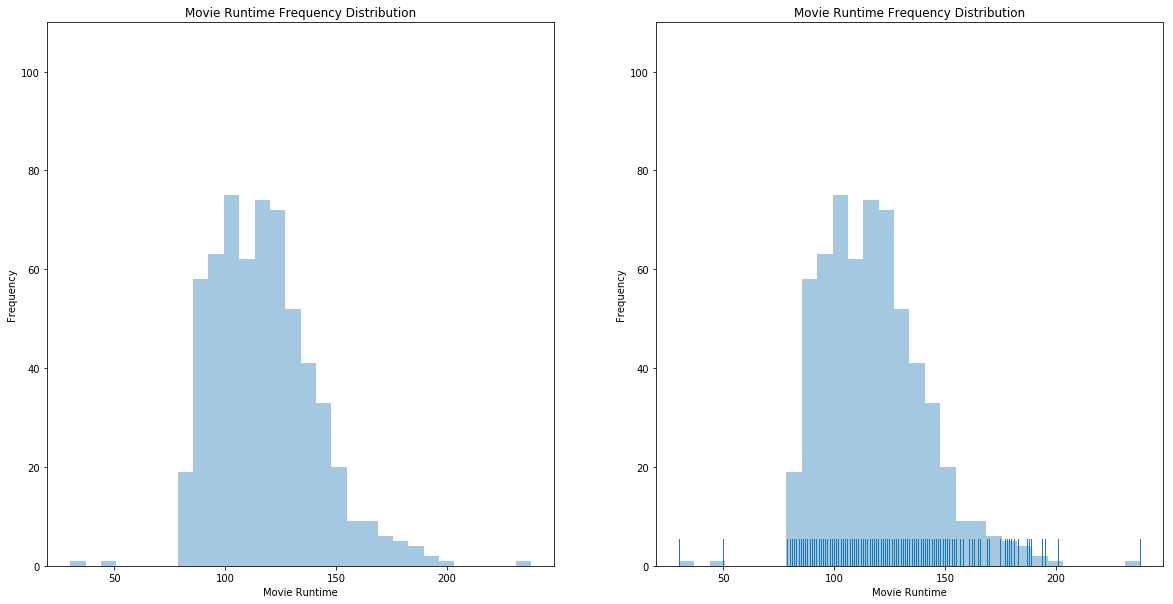

In [10]:
#distplot plots kernel density estimate by default. for reg histogram set to False
plt.subplot(1, 2, 1)
plt.ylim(0,110)
sns.distplot(df.Runtime, kde=False)
plt.xlabel('Movie Runtime')
plt.ylabel('Frequency')
plt.title('Movie Runtime Frequency Distribution')

#add a rug plot
plt.subplot(1,2,2)
plt.ylim(0,110)
sns.distplot(df.Runtime, kde=False, rug = True)
plt.xlabel('Movie Runtime')
plt.ylabel('Frequency')
plt.title('Movie Runtime Frequency Distribution');


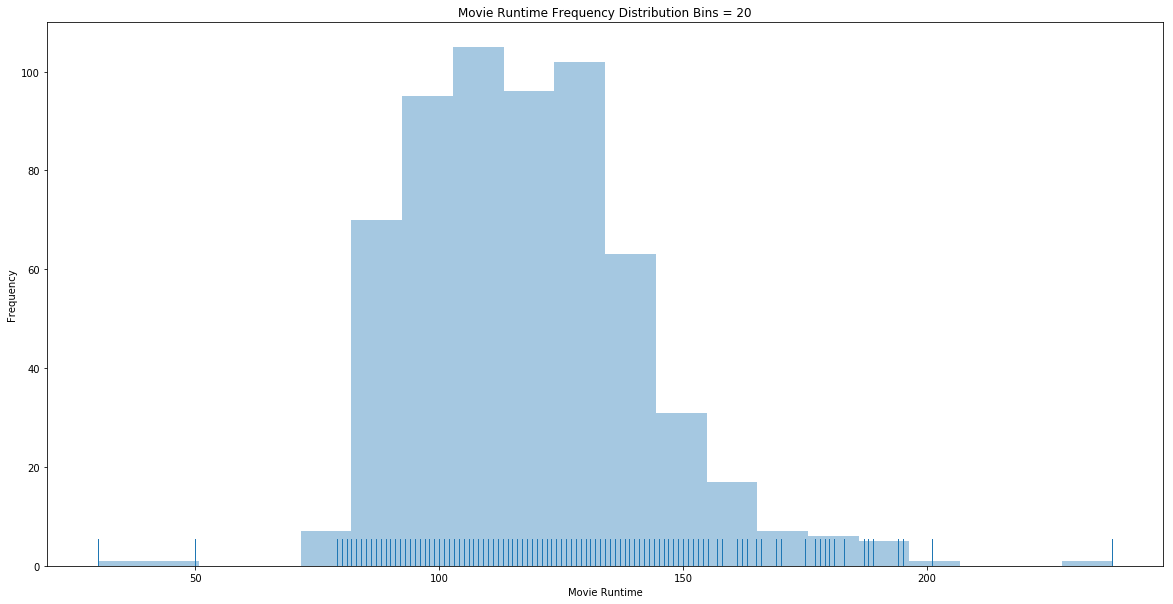

In [11]:
plt.ylim(0,110)
#add in bins parameter
sns.distplot(df.Runtime, bins = 20, kde=False, rug = True)
plt.xlabel('Movie Runtime')
plt.ylabel('Frequency')
plt.title('Movie Runtime Frequency Distribution Bins = 20');

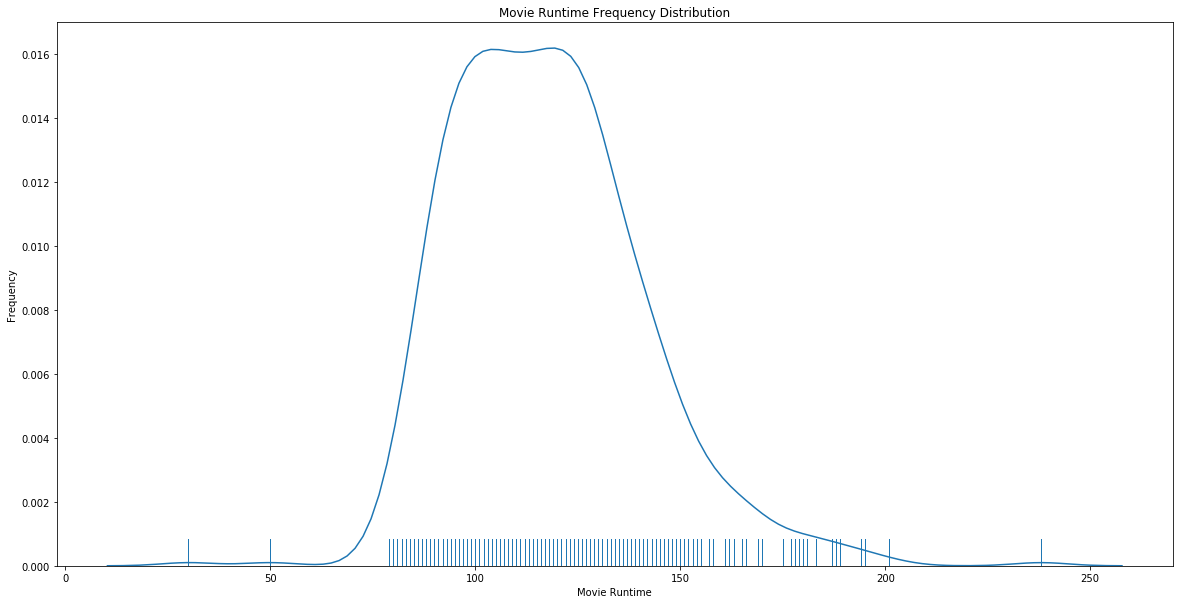

In [12]:
#density, rug, no hist
sns.distplot(df.Runtime, hist=False, rug=True)
plt.xlabel('Movie Runtime')
plt.ylabel('Frequency')
plt.title('Movie Runtime Frequency Distribution');

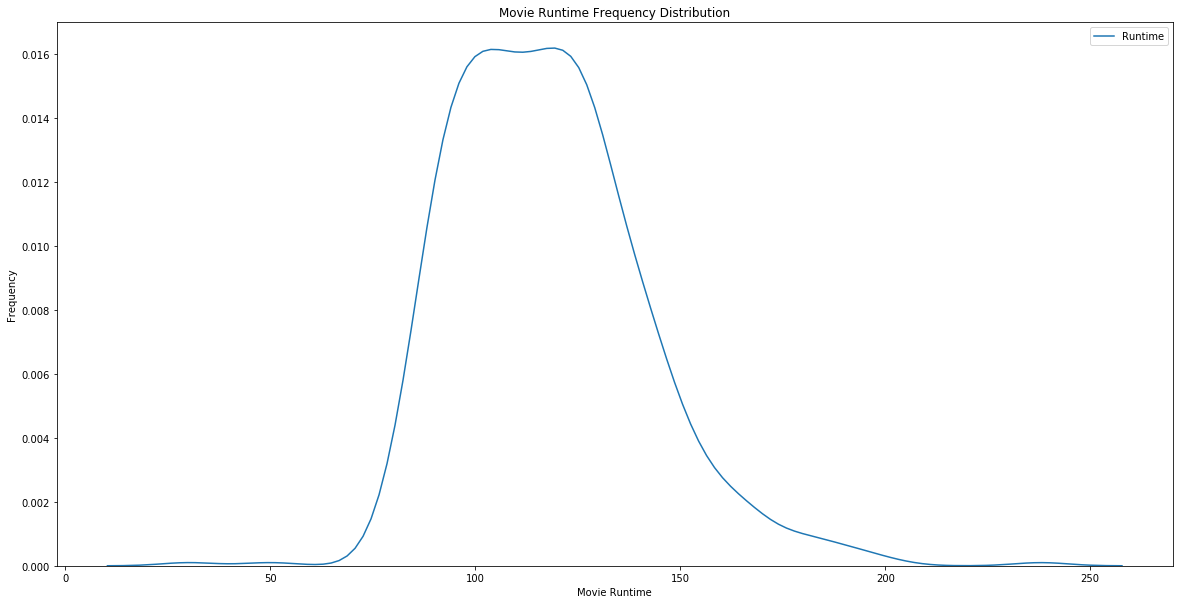

In [13]:
#bare kdeplot using kdeplot instead of distplot
sns.kdeplot(df.Runtime)
plt.xlabel('Movie Runtime')
plt.ylabel('Frequency')
plt.title('Movie Runtime Frequency Distribution');

## Check the underlying distribution.

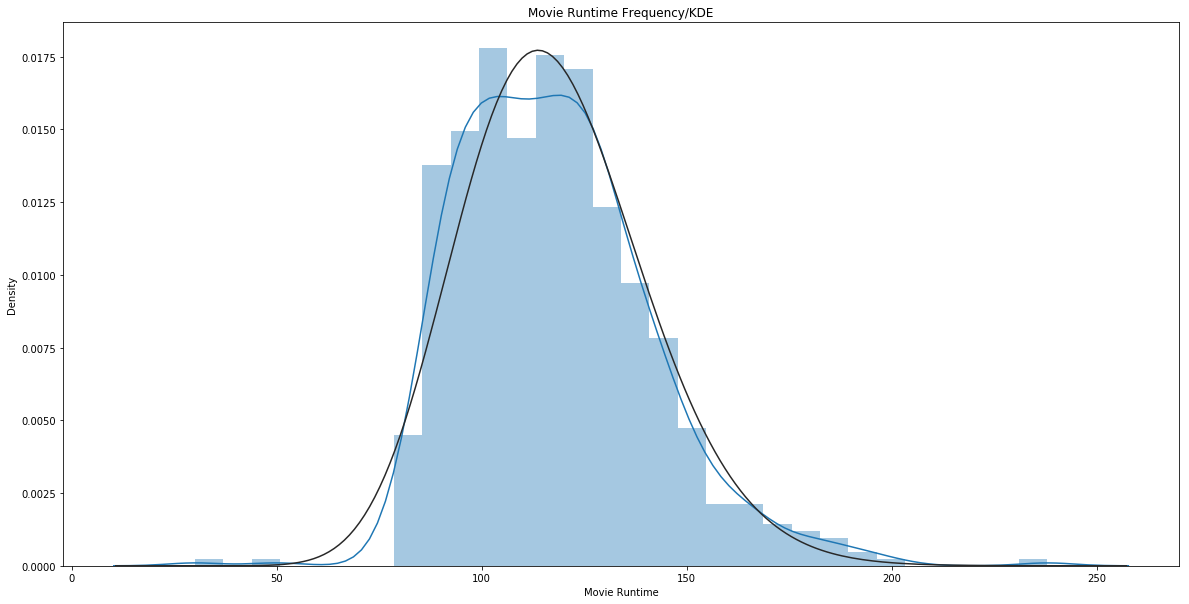

In [14]:
#check the underlying distribution
sns.distplot(df.Runtime, fit = stats.gamma)
plt.xlabel('Movie Runtime')
plt.ylabel('Density')
plt.title('Movie Runtime Frequency/KDE');

## Plotting Bivariate Correlations
**Bivariate Correlation: a correlation between two variables**

In [15]:
df.corr()

,Adjusted_Gross,Budget,Gross,IMDb_Rating,MovieLens_Rating,Overseas,Overseas%,Profit,Profit%,Runtime,US,Gross % US,weekend
Adjusted_Gross,1.000000,0.148537,0.655192,0.272071,0.225777,0.594668,0.042319,0.686806,0.229841,0.341415,0.645391,-0.042319,-0.142326
Budget,0.148537,1.000000,0.511863,-0.026303,-0.031066,0.536799,0.301011,0.311910,-0.298632,0.218664,0.360020,-0.301011,0.023760
Gross,0.655192,0.511863,1.000000,0.267442,0.212869,0.967853,0.243778,0.975851,-0.001589,0.280370,0.864803,-0.243778,-0.079368
IMDb_Rating,0.272071,-0.026303,0.267442,1.000000,0.879836,0.222273,-0.034393,0.302620,0.077253,0.326788,0.304335,0.034393,-0.109011
MovieLens_Rating,0.225777,-0.031066,0.212869,0.879836,1.000000,0.167901,-0.057060,0.243528,0.049759,0.302791,0.260240,0.057060,-0.095546
Overseas,0.594668,0.536799,0.967853,0.222273,0.167901,1.000000,0.445308,0.934006,-0.027440,0.277475,0.710714,-0.445308,-0.061369
Overseas%,0.042319,0.301011,0.243778,-0.034393,-0.057060,0.445308,1.000000,0.193524,-0.084881,0.086538,-0.207146,-1.000000,-0.003783
Profit,0.686806,0.311910,0.975851,0.302620,0.243528,0.934006,0.193524,1.000000,0.074189,0.254618,0.864833,-0.193524,-0.093927
Profit%,0.229841,-0.298632,-0.001589,0.077253,0.049759,-0.027440,-0.084881,0.074189,1.000000,-0.042088,0.050342,0.084881,-0.099970
Runtime,0.341415,0.218664,0.280370,0.326788,0.302791,0.277475,0.086538,0.254618,-0.042088,1.000000,0.230268,-0.086538,-0.115306


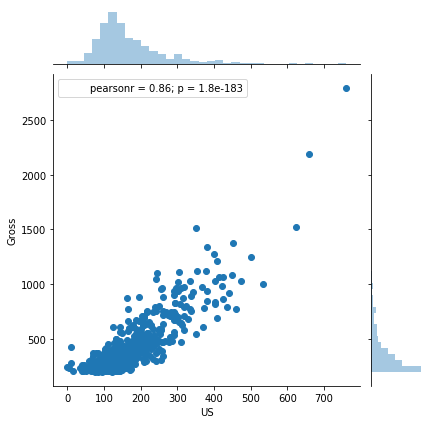

In [16]:
sns.jointplot(x="US", y="Gross", data=df);

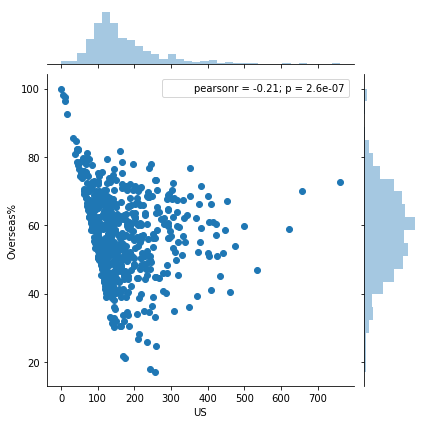

In [17]:
sns.jointplot(x="US", y="Overseas%", data= df);

## Visualize pairwise relationships

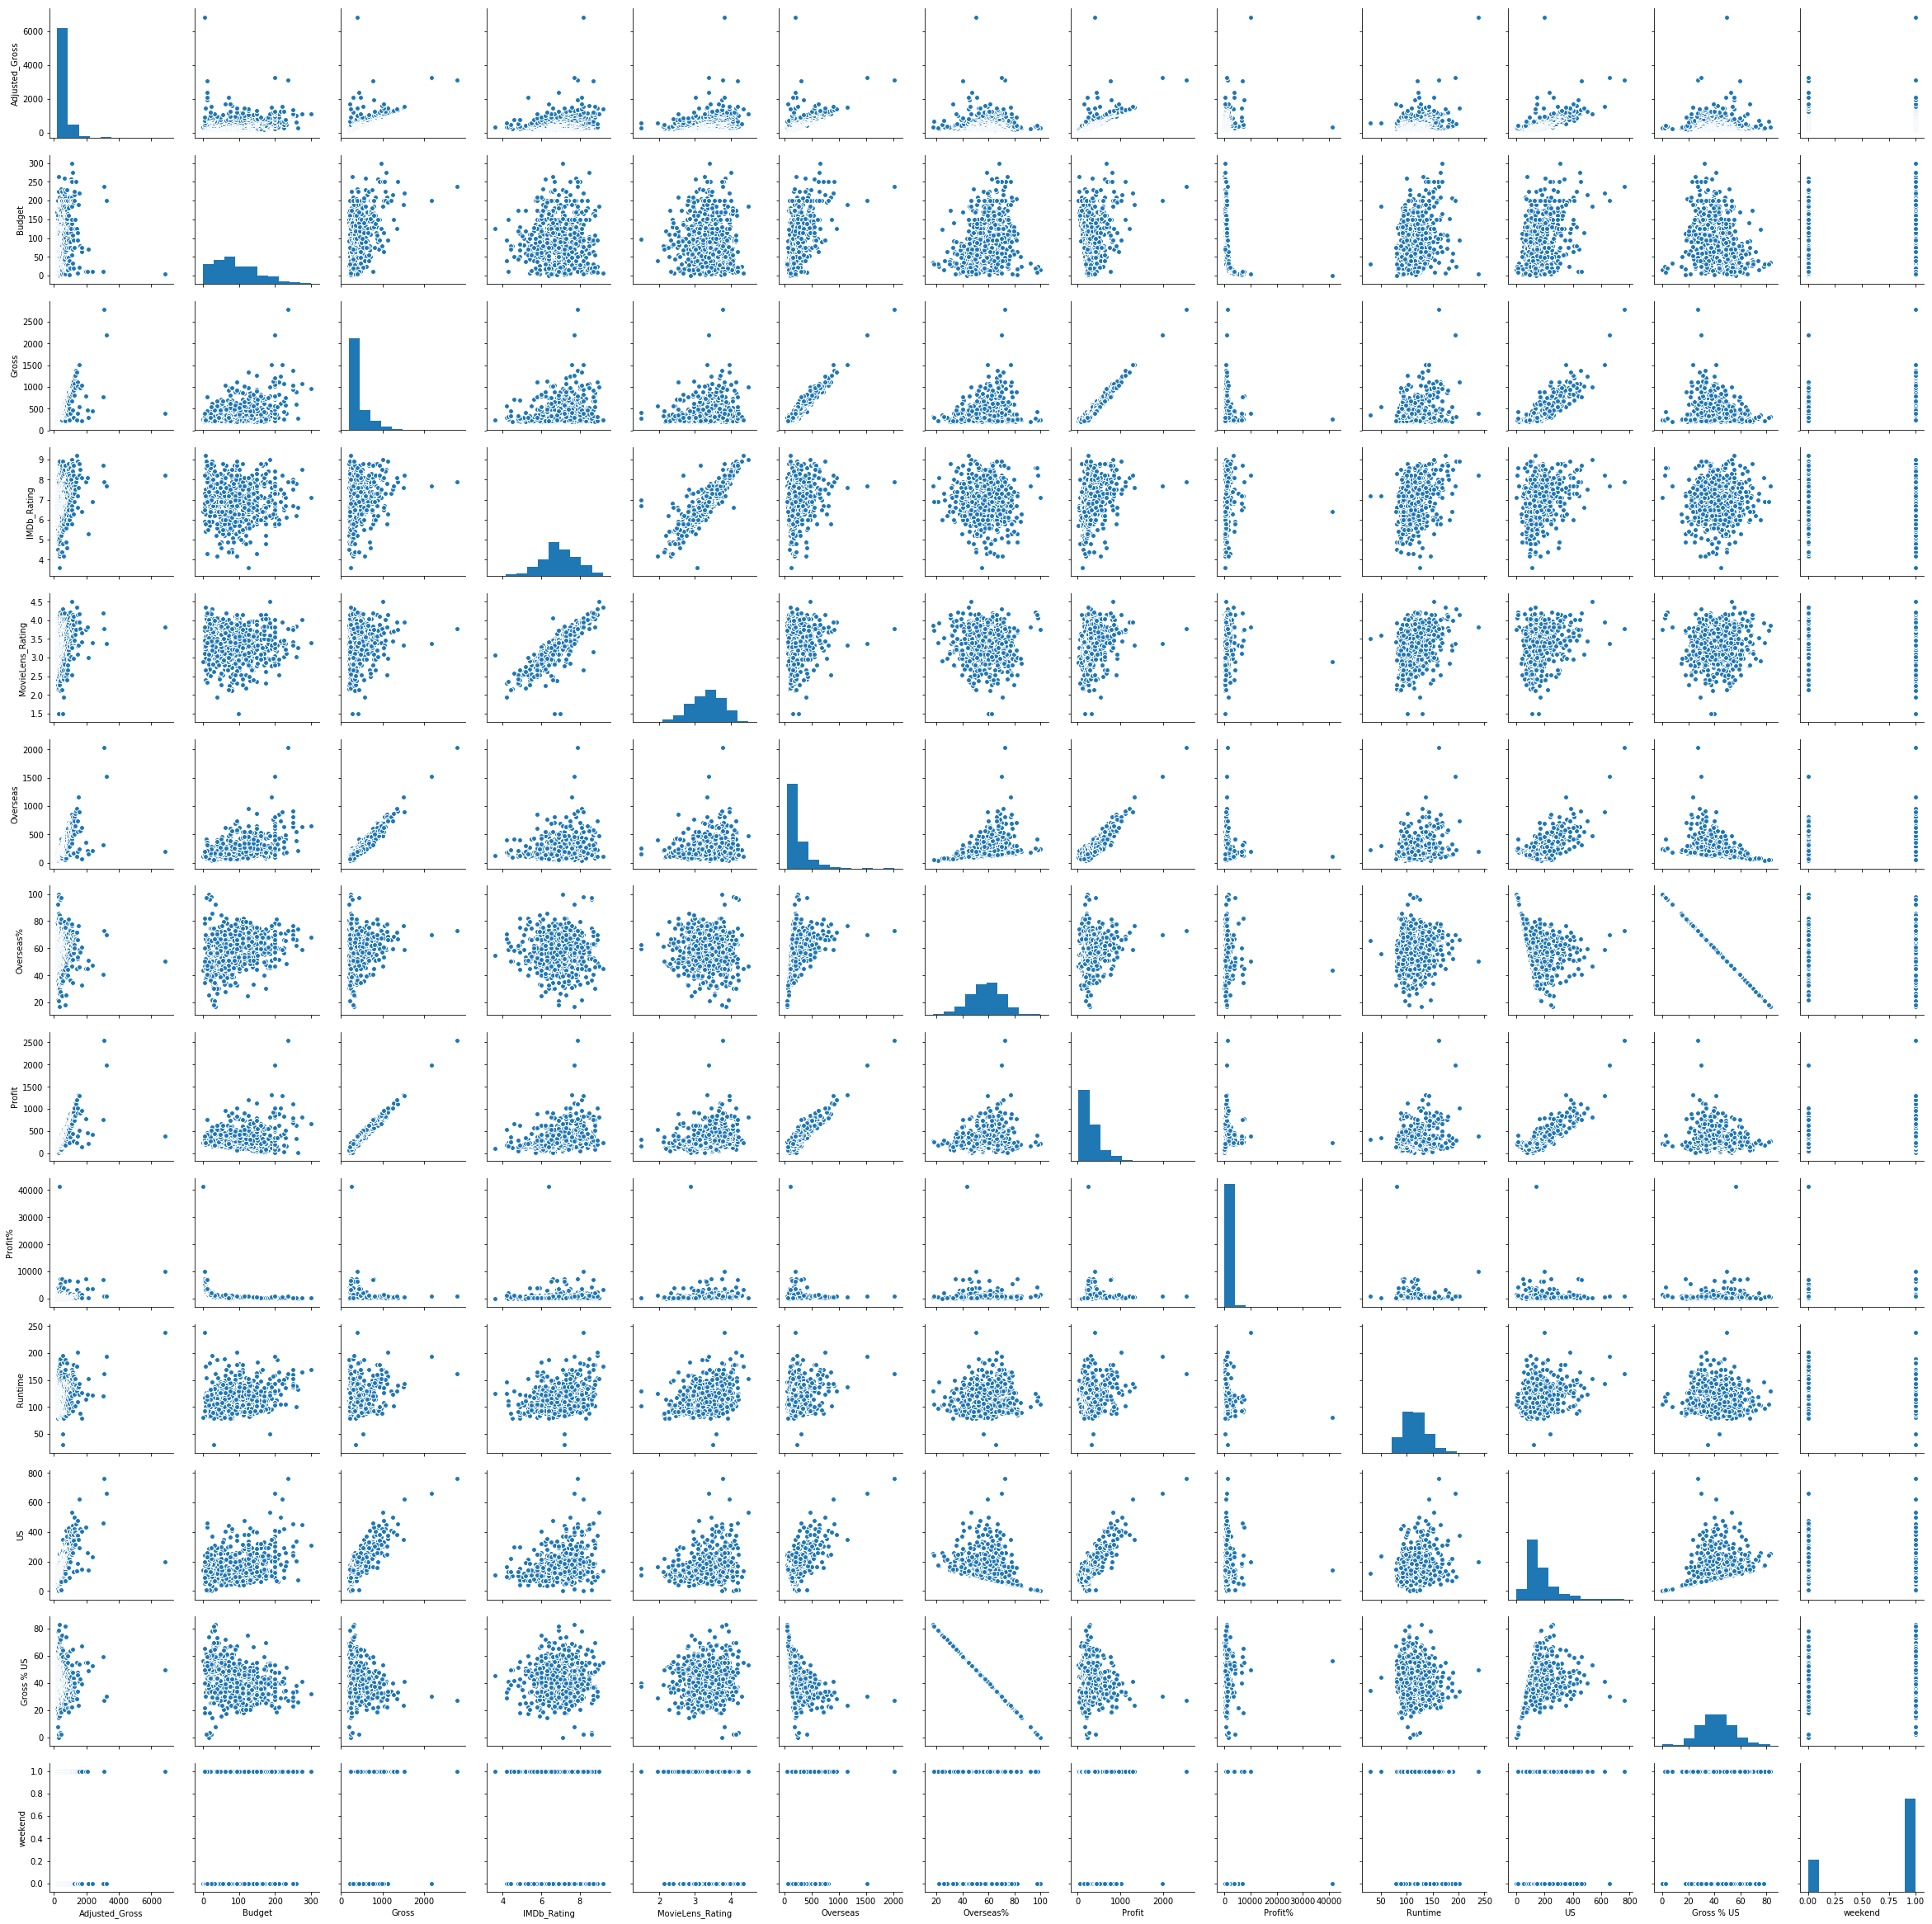

In [18]:
sns.pairplot(df);

## Plotting Categorical Data

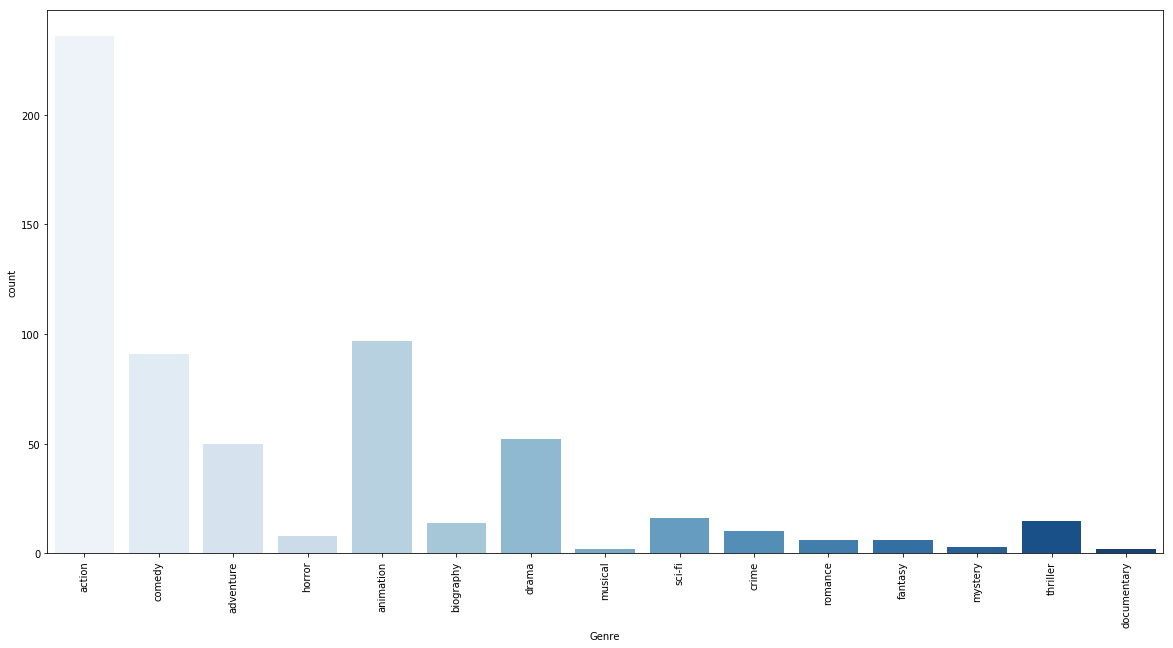

In [19]:
sns.countplot(x="Genre", data=df, palette="Blues")
plt.xticks(rotation = 90);

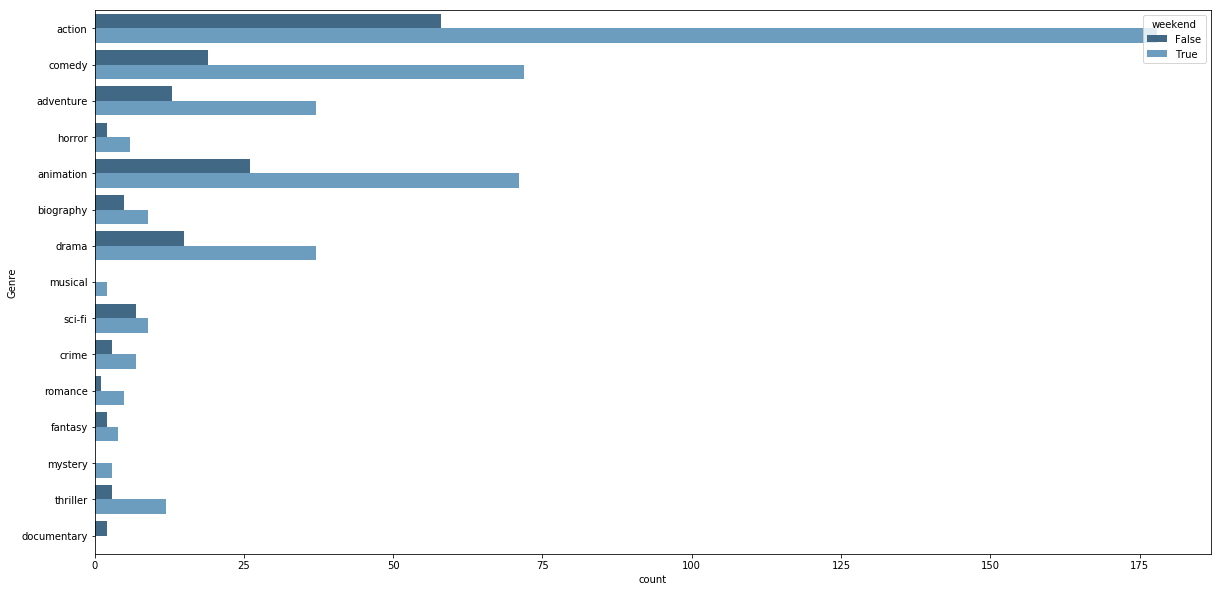

In [20]:
sns.countplot(y="Genre", hue="weekend", data=df, palette="Blues_d");

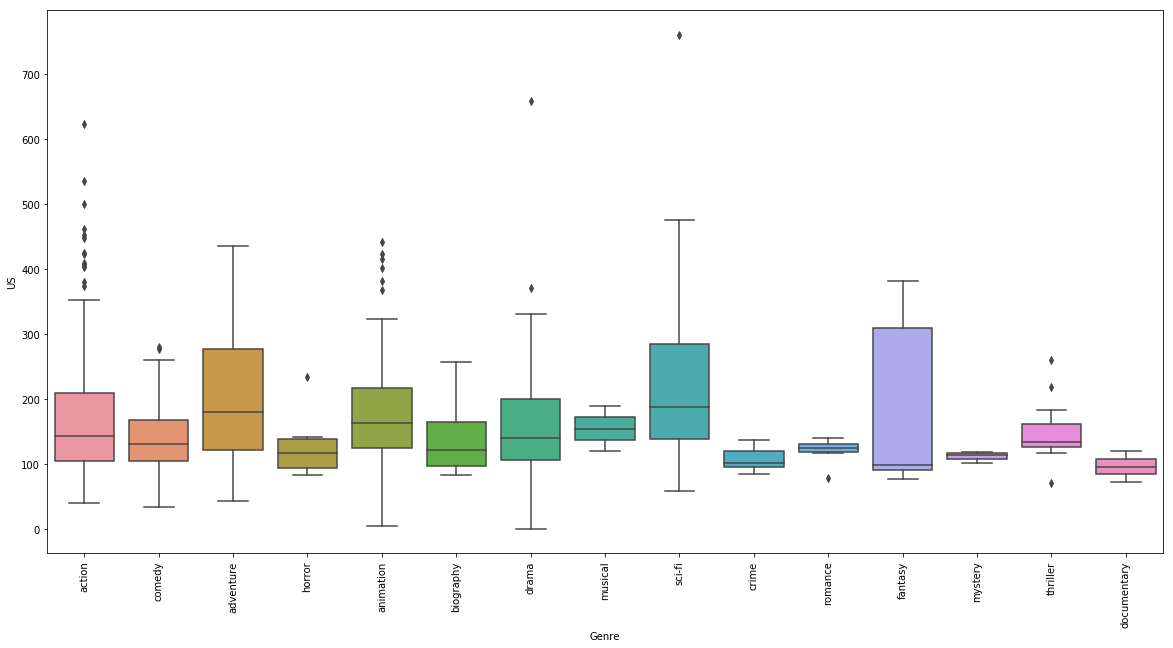

In [21]:
sns.boxplot(x="Genre", y="US", data=df)
plt.xticks(rotation=90);

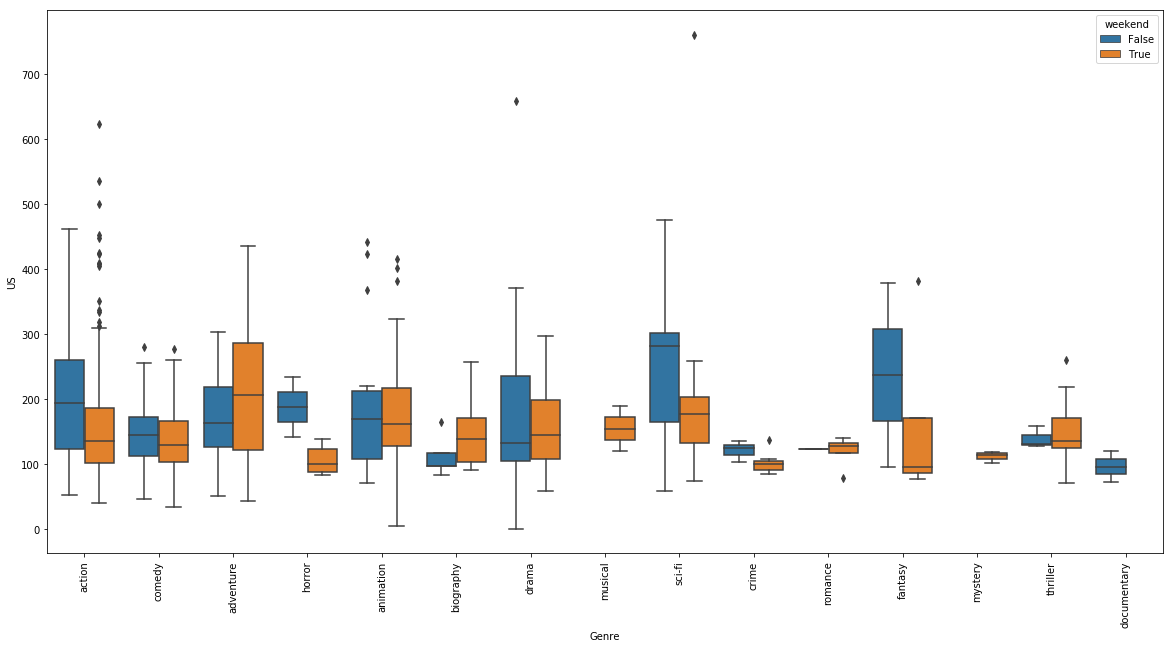

In [22]:
sns.boxplot(x="Genre", y="US", hue="weekend", data=df)
plt.xticks(rotation=90);

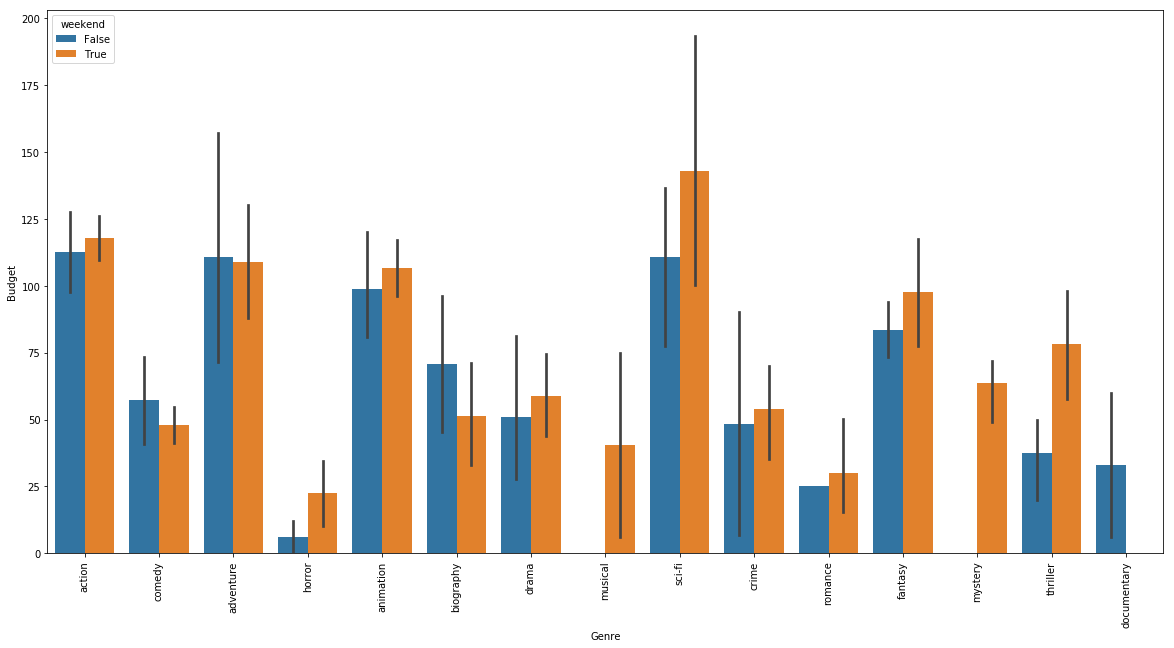

In [23]:
sns.barplot(x="Genre", y="Budget", hue="weekend", data=df)
plt.xticks(rotation = 90);

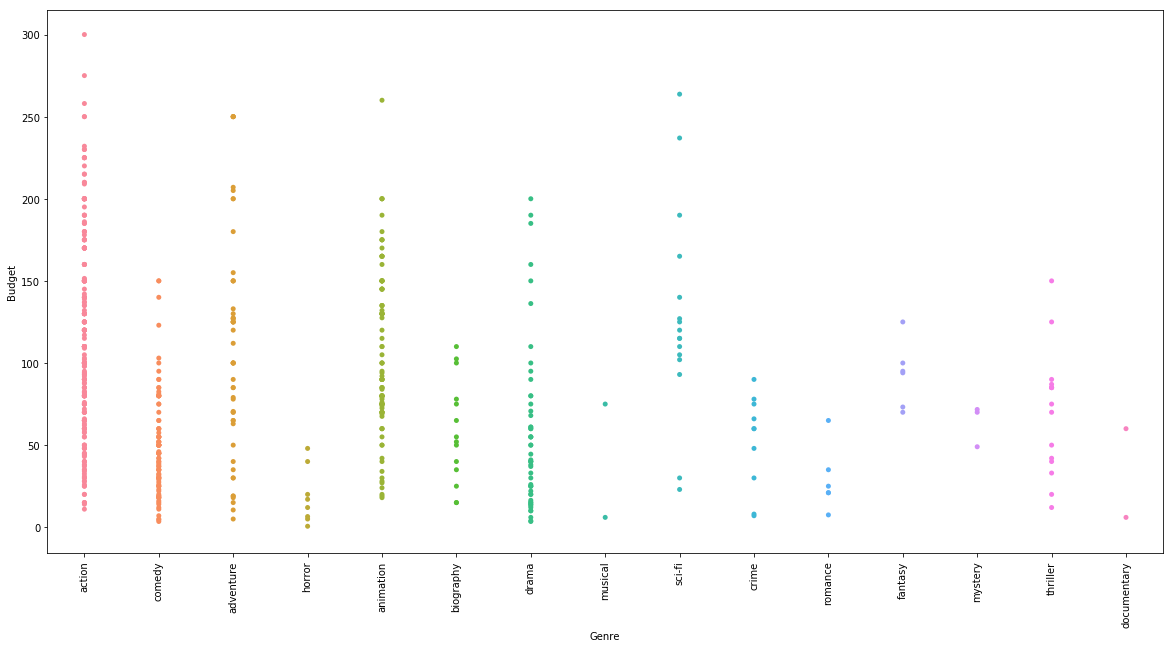

In [24]:
sns.stripplot(x="Genre", y="Budget", data=df)
plt.xticks(rotation=90);

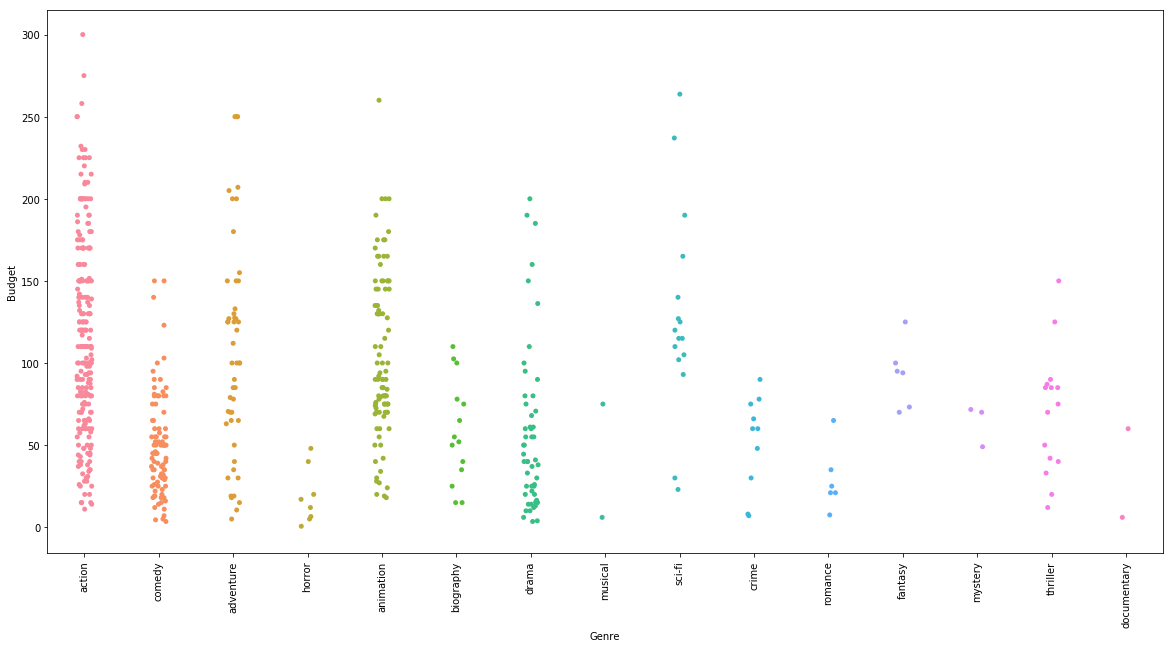

In [25]:
sns.stripplot(x="Genre", y="Budget", data=df, jitter = True)
plt.xticks(rotation=90);

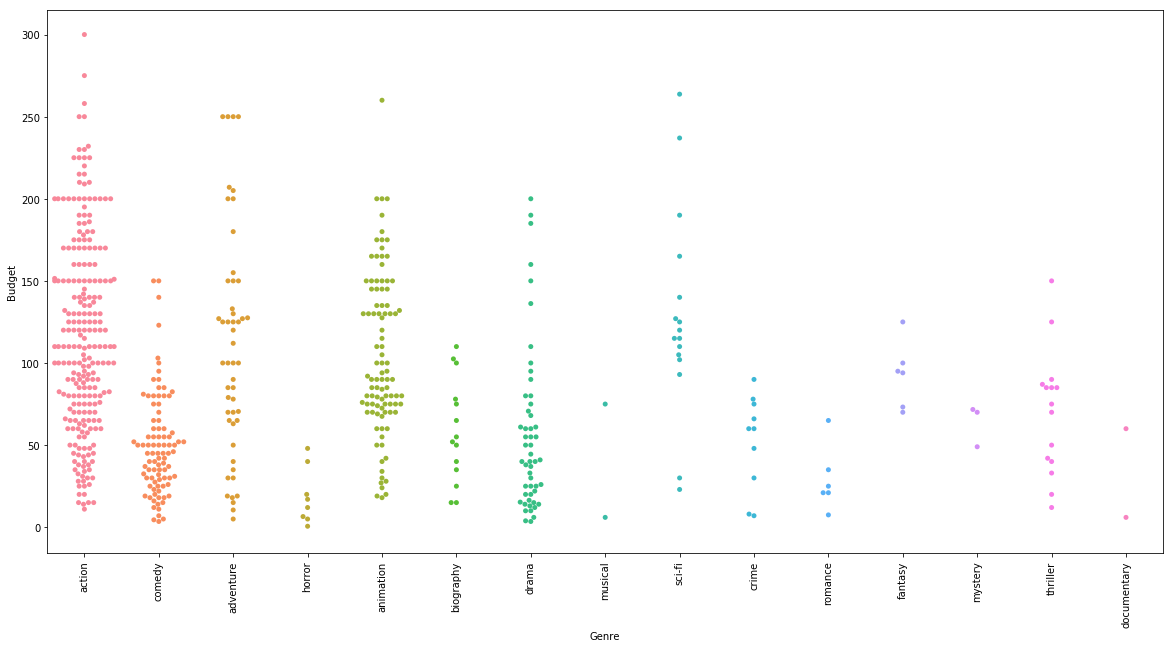

In [26]:
sns.swarmplot(x="Genre", y="Budget", data=df)
plt.xticks(rotation=90);

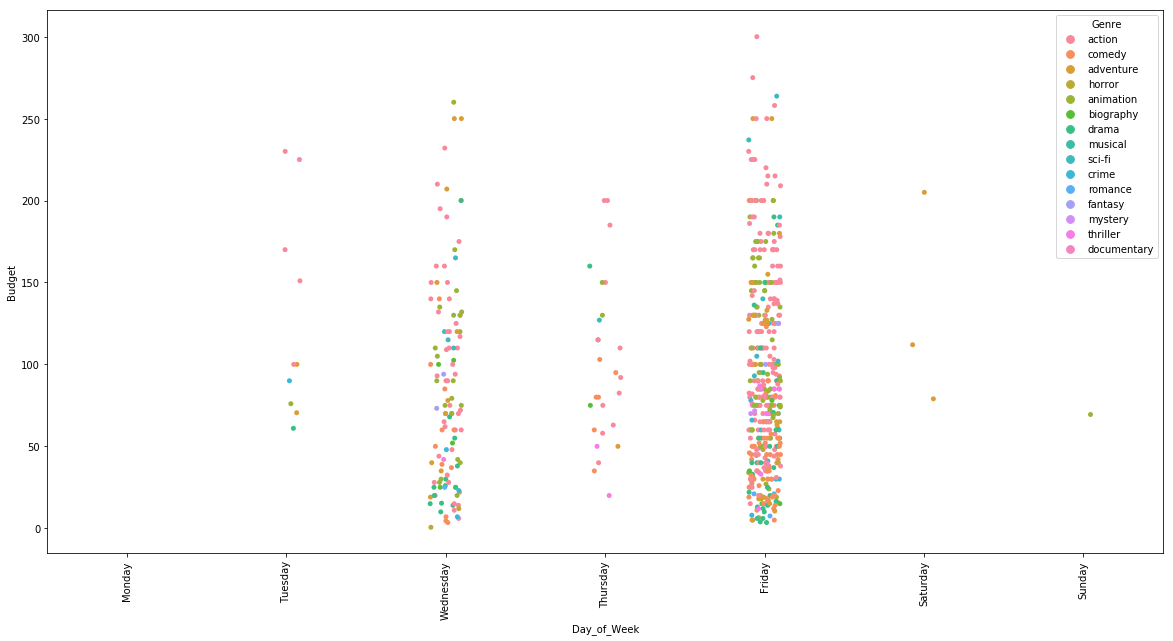

In [27]:
sns.stripplot(x="Day_of_Week", y="Budget", hue = "Genre", data=df, jitter = True)
plt.xticks(rotation=90);

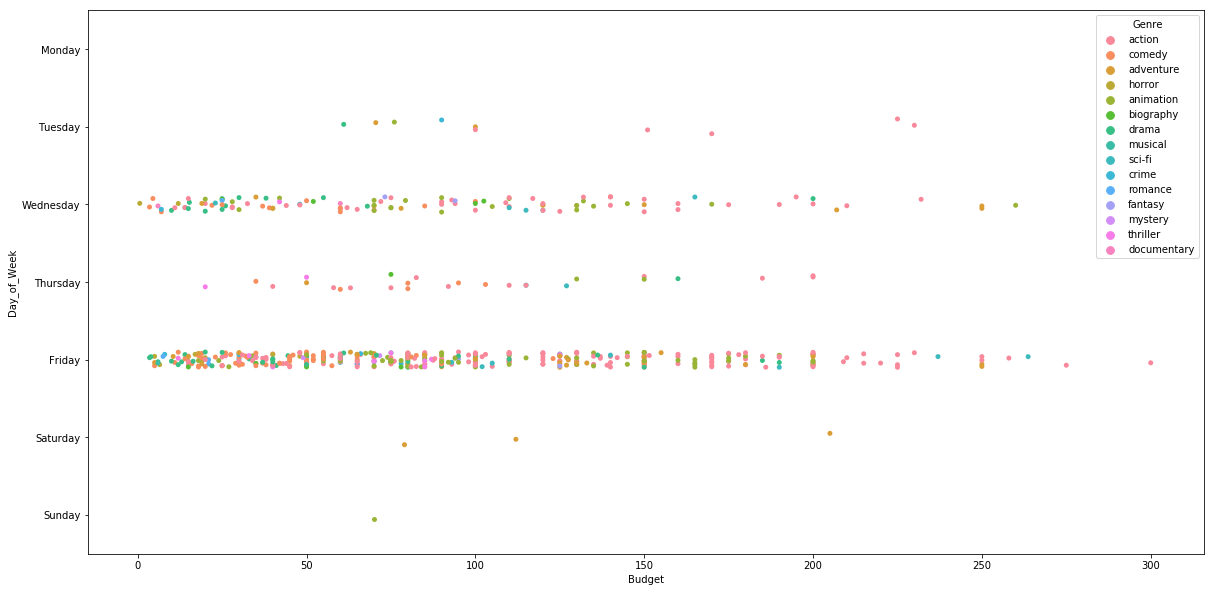

In [28]:
sns.stripplot(x="Budget", y="Day_of_Week", hue = "Genre", data=df, jitter = True);

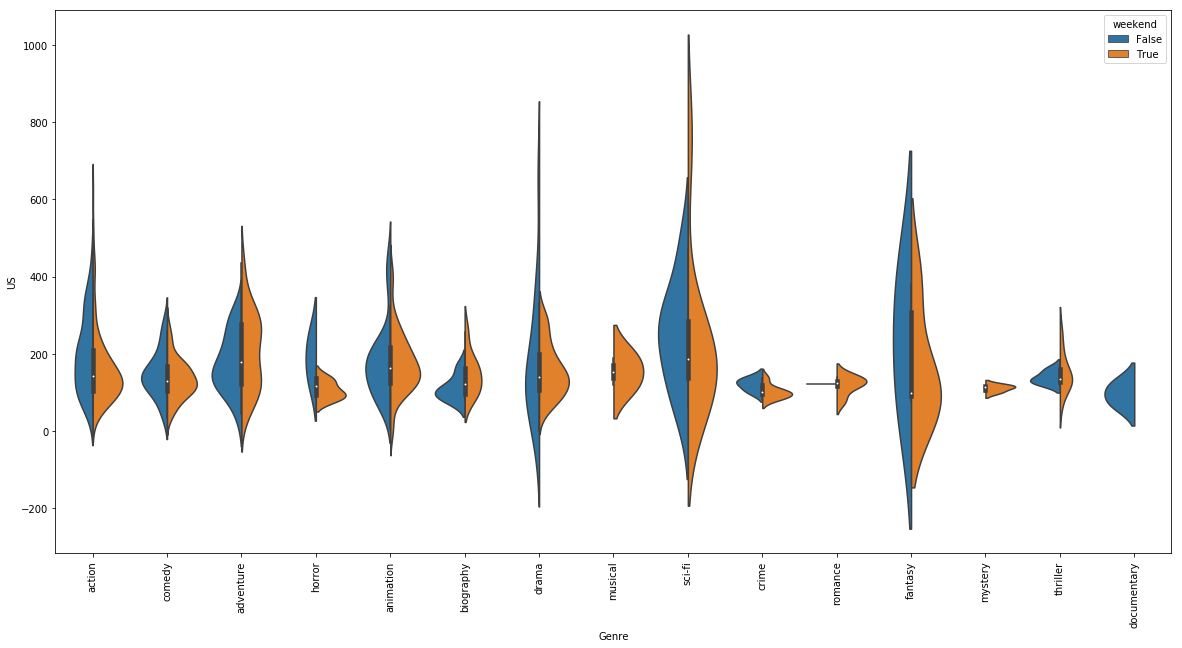

In [29]:
sns.violinplot(x="Genre", y="US", hue="weekend", data=df, split = True)
plt.xticks(rotation=90);

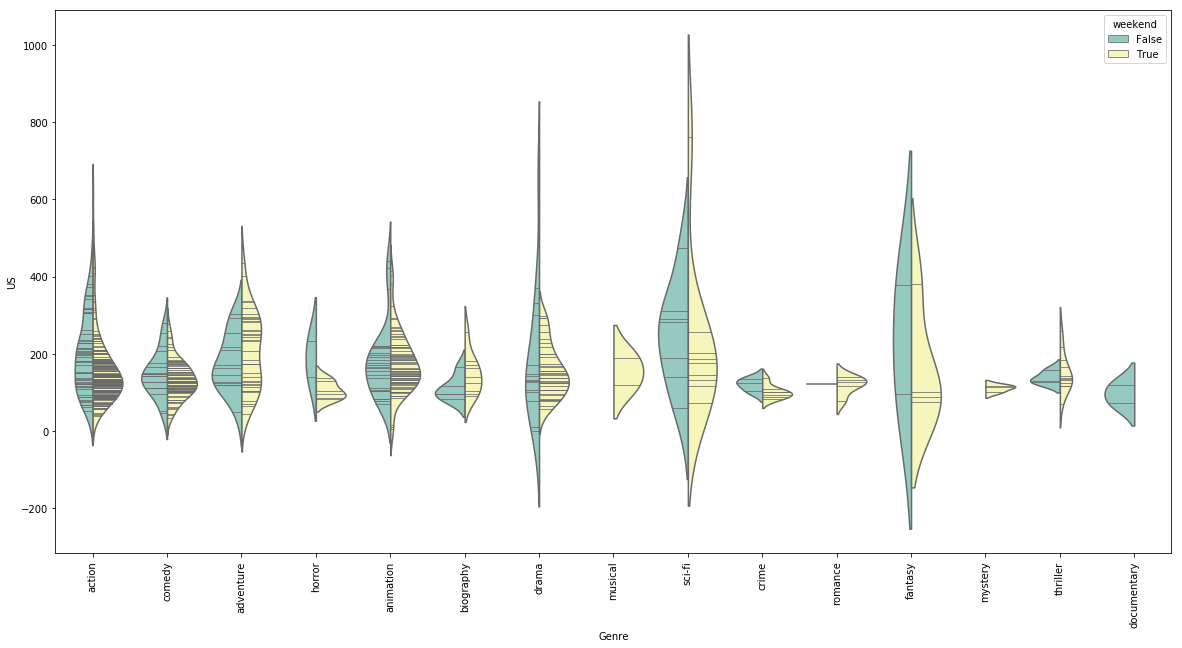

In [30]:
sns.violinplot(x="Genre", y="US", hue="weekend", data=df, split = True, 
               inner="stick", palette="Set3")
plt.xticks(rotation = 90);

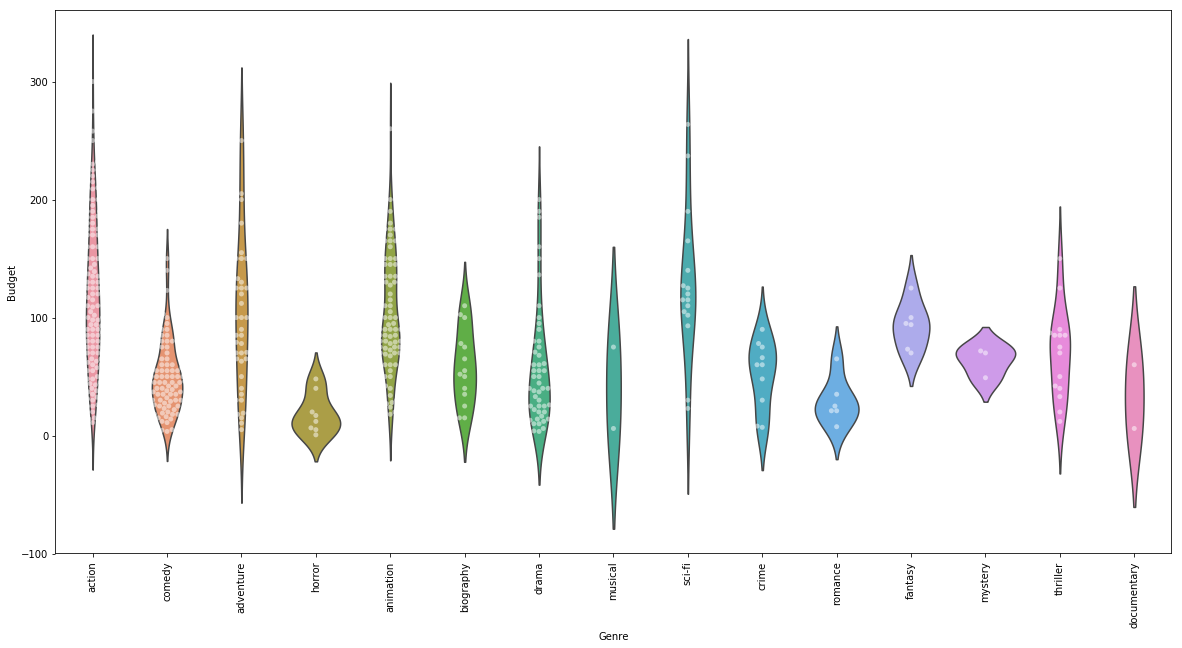

In [31]:
sns.violinplot(x="Genre", y="Budget", data=df, inner=None)
sns.swarmplot(x="Genre", y="Budget", data=df, color="w", alpha=.5)
plt.xticks(rotation = 90);

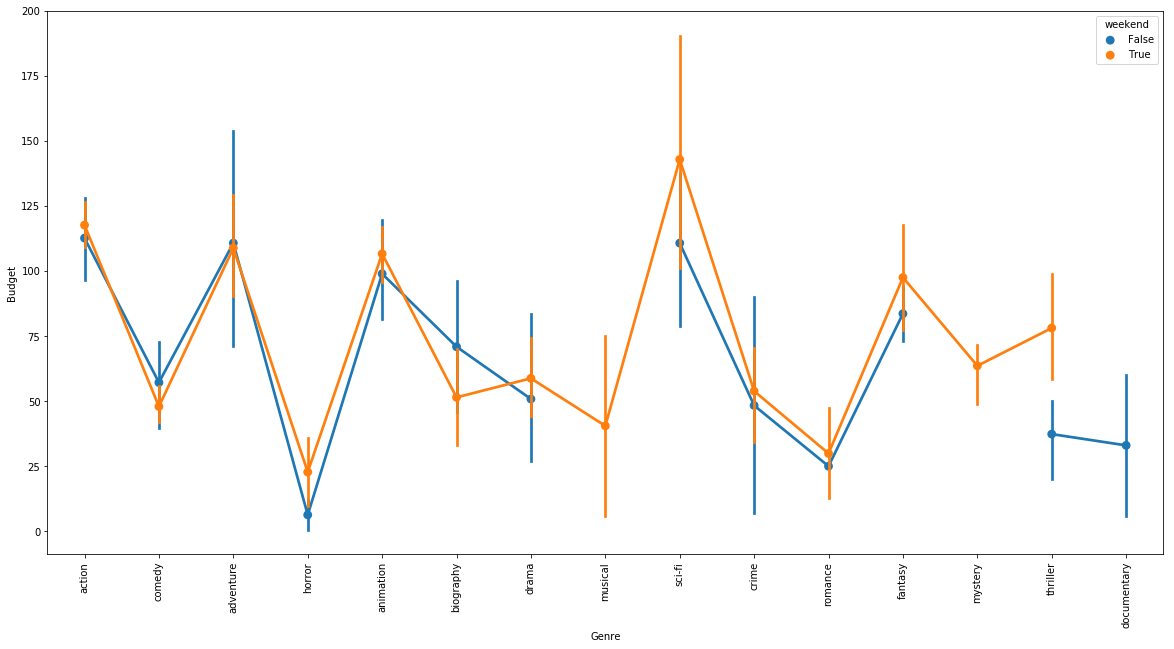

In [32]:
sns.pointplot(x="Genre", y="Budget", hue="weekend", data=df)
plt.xticks(rotation = 90);

[seaborn facet grid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

**Additional Resources:** 
[Seaborn Graphs Gallery](https://seaborn.pydata.org/examples/index.html)